In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# image_path = "/home/spidermines/UCR/Q3/ACV/Assignment-1/TEST_IMAGES/lena_gray_256_noisy.png"
image_path = "/content/drive/MyDrive/ACV/Assignment-1/TEST_IMAGES/lena_gray_256_noisy.png"

In [ ]:
noisy_img = plt.imread(image_path)
.
noisy_img = torch.tensor(noisy_img, dtype=torch.float32)

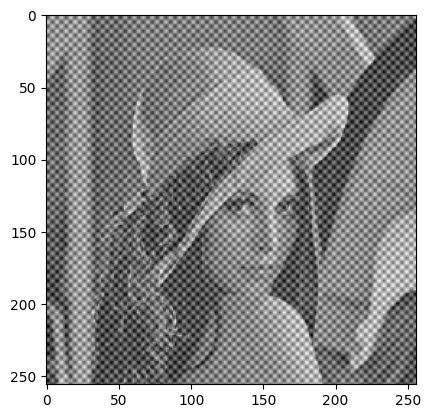

In [ ]:
plt.imshow(noisy_img, cmap="gray")

In [ ]:
# Construct Gaussian pyramid by it iteratively resizing the image to smaller dimensions.

def gaussian_pyramid(image, levels):
    pyramid = [image]
    for _ in range(1, levels):
        height, width = image.shape[-2:]
        new_size = (height // 2, width // 2)
        image = TF.resize(image, new_size)
        pyramid.append(image)
    return pyramid


In [ ]:
# Generates a 1D Gaussian kernel.
def gaussian_kernel(size, sigma):
    x = torch.arange(size, dtype=torch.float32)
    kernel = torch.exp(-0.5 * ((x - size // 2) / sigma) ** 2)
    kernel = kernel / kernel.sum()
    return kernel

In [ ]:
# Apply Gaussian filter
def gaussian_filter(image, sigma):
    kernel_size = int(4 * sigma + 1)
    kernel = gaussian_kernel(kernel_size, sigma)
    kernel = kernel.unsqueeze(0)
    kernel = kernel.unsqueeze(0)
    image = torch.nn.functional.conv2d(image, kernel.unsqueeze(0), padding=kernel_size // 2)
    return image.squeeze(0).squeeze(0)


In [ ]:
#This function works to clean up a noisy image by breaking it down into different versions at varying levels of detail using a Gaussian pyramid.
#Then, it smooths out the noise in each version using Gaussian filtering.
#Finally, it reconstructs the cleaned-up image by piecing together the smoothed versions.

def denoise_gaussian_pyramid(noisy_img, levels, sigma):
    # Create Gaussian pyramid
    noisy_pyramid = gaussian_pyramid(noisy_img.unsqueeze(0), levels)

    # Apply Gaussian filter to each level of the pyramid
    for i in range(len(noisy_pyramid)):
        noisy_pyramid[i] = gaussian_filter(noisy_pyramid[i], sigma)

    # Reconstruct the denoised image from the pyramid
    denoised_img = noisy_pyramid[-1]
    for i in range(len(noisy_pyramid) - 2, -1, -1):
        expanded_img = TF.resize(denoised_img.unsqueeze(0), noisy_pyramid[i].shape, interpolation=TF.InterpolationMode.BILINEAR)
        expanded_img = expanded_img.squeeze(0)
        expanded_img = expanded_img[:noisy_pyramid[i].shape[-2], :noisy_pyramid[i].shape[-1]]
        denoised_img = noisy_pyramid[i] + expanded_img
    return denoised_img.squeeze(0)

In [ ]:
# denoised_img = denoise_gaussian_pyramid(noisy_img, levels=2, sigma=1)

In [ ]:
sigma_values = [0.5, 1.0, 1.5]
level_values = [2, 3, 4]

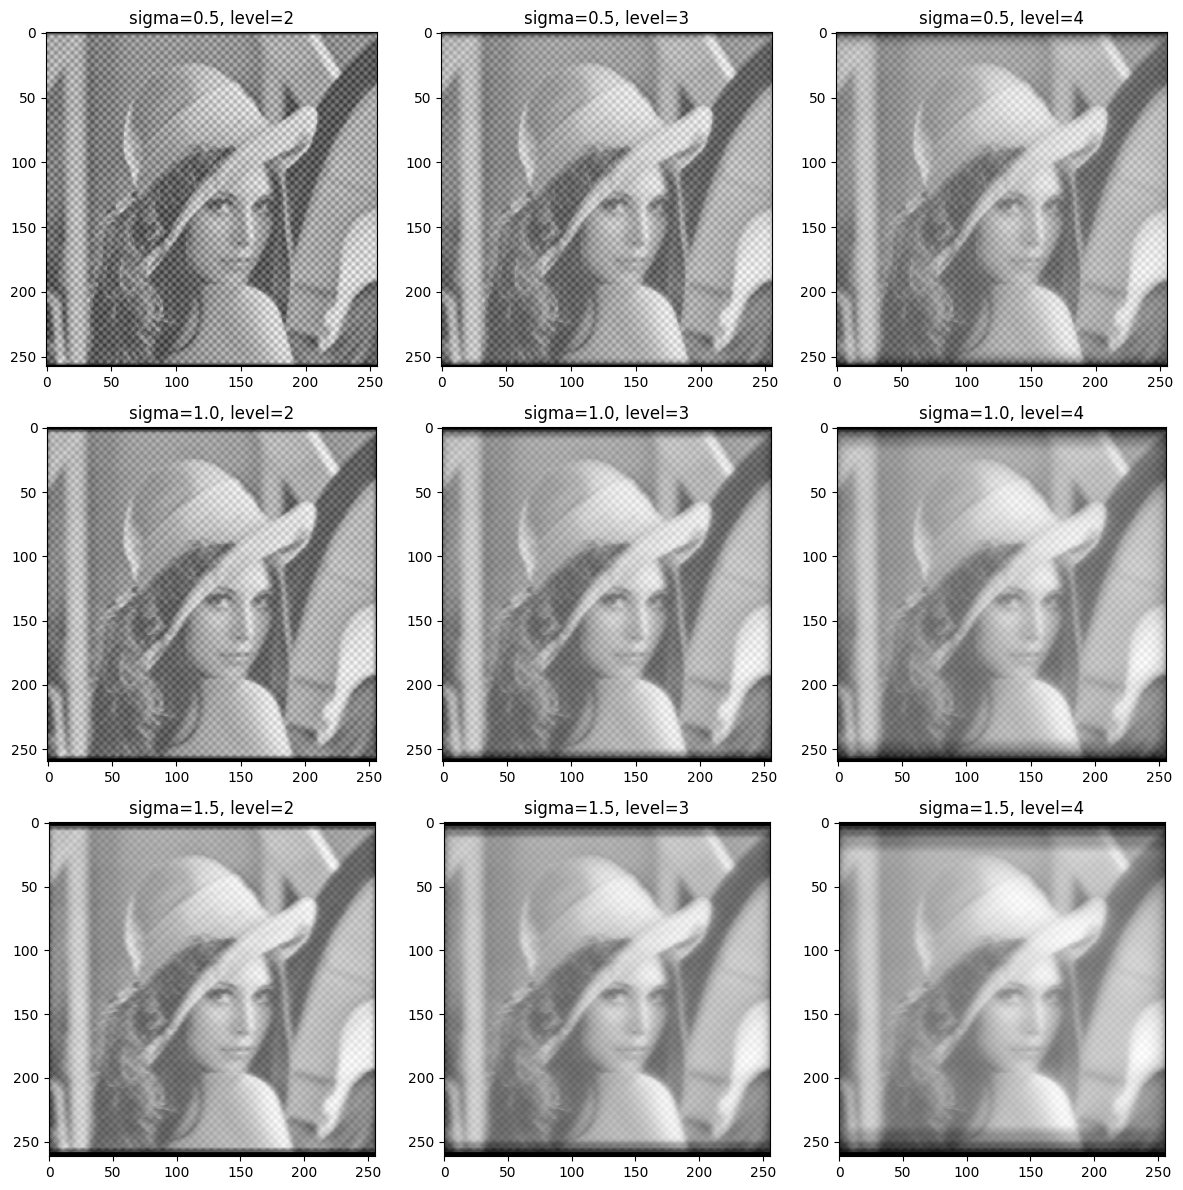

In [ ]:
#Denoising image for different levels of sigma and level

fig, axs = plt.subplots(len(sigma_values), len(level_values), figsize=(12, 12))

for x, s in enumerate(sigma_values):
    for y, l in enumerate(level_values):
        denoised_img = denoise_gaussian_pyramid(noisy_img, levels=l, sigma=s)
        axs[x, y].imshow(denoised_img, cmap='gray')
        axs[x, y].set_title(f'sigma={s}, level={l}')

plt.tight_layout()
plt.show()

I used Gaussian filter because it's good at reducing noise while keeping the image clear. I adjusted params: sigma and kernel size to find the right balance between reducing noise and keeping details sharp.
The Gaussian pyramid helps by breaking down the image into different levels, making it easier to clean up noise across the whole picture.